## Problem statement

As a data scientist we need to predict the driver team attrition (Churn prediction) for Ola.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load data &Overview

In [73]:
ola_df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/492/original/ola_driver_scaler.csv')
ola_df

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


## Overview of data

In [74]:
ola_df.shape

(19104, 14)

In [75]:
ola_df.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

## Basic data engineering - Converting 0/1 based on Last working Date

In [76]:
# 0 - Still Working
# 1 - Left from organization
ola_df["LastWorkingDate"] = ola_df["LastWorkingDate"].notnull().astype("int")
ola_df

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,0,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,0,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,1,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,0,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,0,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,0,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,0,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,0,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,0,2,2,200420,2


### Target data splitage

Text(0.5, 1.02, 'Count of TARGET Variable per category')

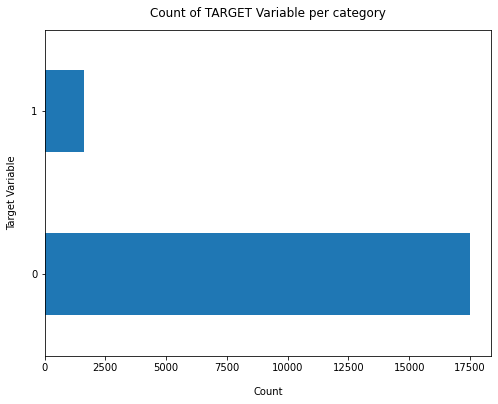

In [77]:
ola_df['LastWorkingDate'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)

In [78]:
ola_df['LastWorkingDate'].value_counts()

0    17488
1     1616
Name: LastWorkingDate, dtype: int64

Based on target variable it is completely imbalanced data

### data types of all the attributes

In [79]:
ola_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       19104 non-null  int32  
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int32(1), int64(8), object(3)
memory usage: 2.0+ MB


### Unique Values

In [80]:
ola_df.nunique()

Unnamed: 0              19104
MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate             2
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

### Missing value & Dulcate check

In [81]:
ola_df.isna().sum()

Unnamed: 0               0
MMM-YY                   0
Driver_ID                0
Age                     61
Gender                  52
City                     0
Education_Level          0
Income                   0
Dateofjoining            0
LastWorkingDate          0
Joining Designation      0
Grade                    0
Total Business Value     0
Quarterly Rating         0
dtype: int64

In [82]:
ola_df.duplicated().sum()

0

### statical sumary

In [83]:
display(ola_df.describe())

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,0.084590,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.278277,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,0.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,0.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,0.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,0.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,1.000000,5.000000,5.000000,3.374772e+07,4.000000


## Univaiate Anayysis

### countplots of the categorical variables

<AxesSubplot:xlabel='Gender', ylabel='count'>

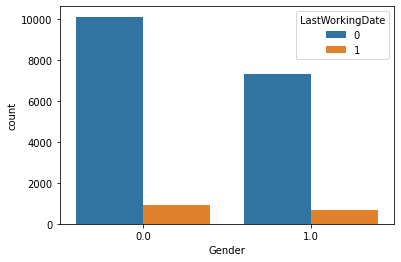

In [84]:
import seaborn as sns
sns.countplot(x=ola_df["Gender"], hue='LastWorkingDate', data=ola_df)

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

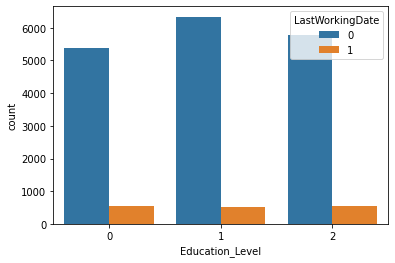

In [85]:
sns.countplot(x=ola_df["Education_Level"], hue='LastWorkingDate', data=ola_df)

<AxesSubplot:xlabel='Grade', ylabel='count'>

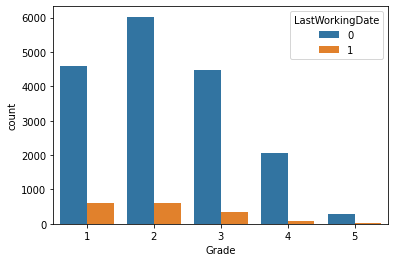

In [86]:
sns.countplot(x=ola_df["Grade"], hue='LastWorkingDate', data=ola_df)

<AxesSubplot:xlabel='Joining Designation', ylabel='count'>

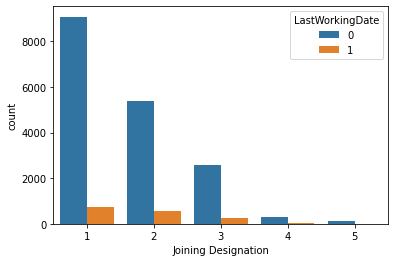

In [87]:
sns.countplot(x=ola_df["Joining Designation"], hue='LastWorkingDate', data=ola_df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

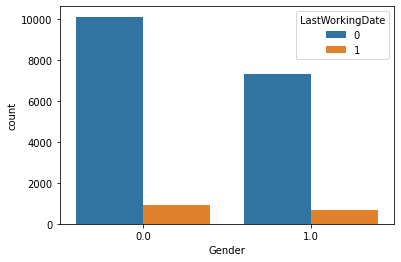

In [88]:
sns.countplot(x=ola_df["Gender"], hue='LastWorkingDate', data=ola_df)

## Bivariate Analysis

### Correlatio Marix

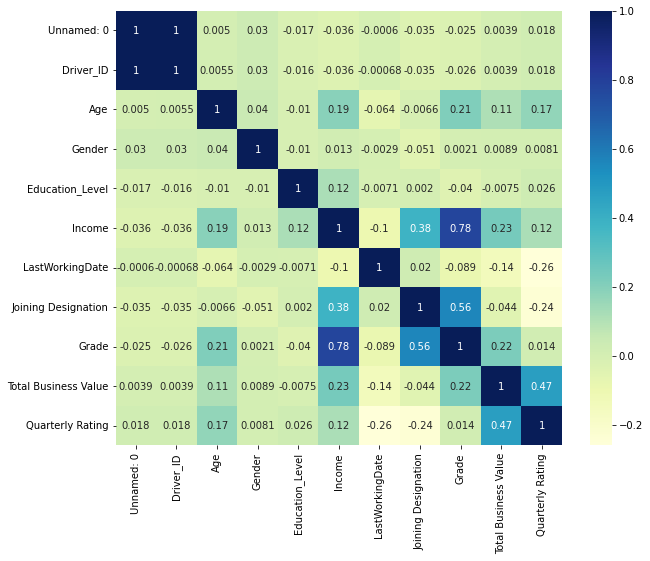

In [89]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(ola_df.corr(), cmap="YlGnBu", annot=True)

## How much target variable (LastWorkingDate) depends on different predictor variables

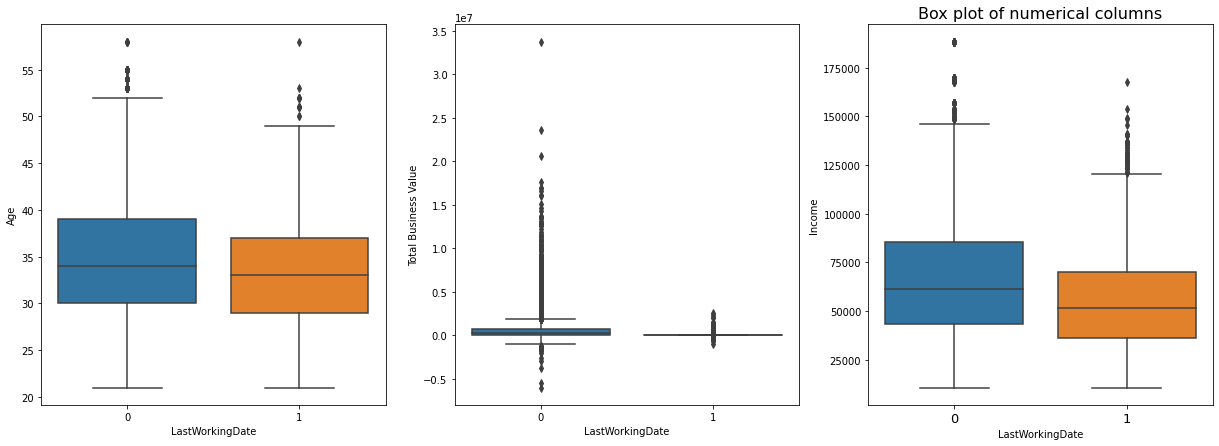

In [90]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(21,7))
sns.boxplot(x = 'LastWorkingDate', y = 'Age', data=ola_df, ax=ax1)
sns.boxplot(x = 'LastWorkingDate', y = 'Total Business Value', data=ola_df, ax=ax2)
sns.boxplot(x = 'LastWorkingDate', y = 'Income', data=ola_df, ax=ax3)
plt.xticks(fontsize= 13)
plt.title('Box plot of numerical columns', fontsize=16);

### Scatter plot

<AxesSubplot:xlabel='Dateofjoining', ylabel='Income'>

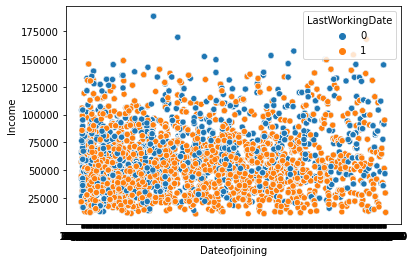

In [91]:
sns.scatterplot(data=ola_df, x=ola_df['Dateofjoining'], y=ola_df['Income'], hue=ola_df['LastWorkingDate'])

## Basic Data Engineering

In [92]:
ola_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       19104 non-null  int32  
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int32(1), int64(8), object(3)
memory usage: 2.0+ MB


In [93]:
ola_df.drop('Unnamed: 0', inplace=True, axis=1)

In [94]:
ola_df[["rday", "rmonth", "ryear"]] = ola_df["MMM-YY"].str.split("/", expand = True)
ola_df.drop('MMM-YY', inplace=True, axis=1)

In [95]:
ola_df[["joiningday", "joiningmonth", "joiningyear"]] = ola_df["Dateofjoining"].str.split("/", expand = True)
ola_df.drop('Dateofjoining', inplace=True, axis=1)

## Label encoding

In [96]:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
ola_df['City']= label_encoder.fit_transform(ola_df['City'])
  
# df['species'].unique()

In [97]:
ola_df

,Driver_ID,Age,Gender,City,Education_Level,Income,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,rday,rmonth,ryear,joiningday,joiningmonth,joiningyear
0,1,28.0,0.0,15,2,57387,0,1,1,2381060,2,01,01,19,24,12,18
1,1,28.0,0.0,15,2,57387,0,1,1,-665480,2,02,01,19,24,12,18
2,1,28.0,0.0,15,2,57387,1,1,1,0,2,03,01,19,24,12,18
3,2,31.0,0.0,26,2,67016,0,2,2,0,1,11,01,20,11,06,20
4,2,31.0,0.0,26,2,67016,0,2,2,0,1,12,01,20,11,06,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2788,30.0,0.0,19,2,70254,0,2,2,740280,3,08,01,20,06,08,20
19100,2788,30.0,0.0,19,2,70254,0,2,2,448370,3,09,01,20,06,08,20
19101,2788,30.0,0.0,19,2,70254,0,2,2,0,2,10,01,20,06,08,20
19102,2788,30.0,0.0,19,2,70254,0,2,2,200420,2,11,01,20,06,08,20


In [101]:
ola_df.columns

Index(['Driver_ID', 'Age', 'Gender', 'City', 'Education_Level', 'Income',
       'LastWorkingDate', 'Joining Designation', 'Grade',
       'Total Business Value', 'Quarterly Rating', 'rday', 'rmonth', 'ryear',
       'joiningday', 'joiningmonth', 'joiningyear'],
      dtype='object')

## Missing Value & KNN Imputation

In [98]:
ola_df.isna().sum()

Driver_ID                0
Age                     61
Gender                  52
City                     0
Education_Level          0
Income                   0
LastWorkingDate          0
Joining Designation      0
Grade                    0
Total Business Value     0
Quarterly Rating         0
rday                     0
rmonth                   0
ryear                    0
joiningday               0
joiningmonth             0
joiningyear              0
dtype: int64

In [104]:
# knn imputation transform for the horse colic dataset
from numpy import isnan
from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')


# define imputer
imputer = KNNImputer()
# fit on the dataset
imputer.fit(ola_df)
# transform the dataset
Xtrans = imputer.transform(ola_df)

ola_df = pd.DataFrame(Xtrans, columns = ola_df.columns)


## Test Train split

In [105]:
X = ola_df.drop(columns=['LastWorkingDate'], axis=0)
X

,Driver_ID,Age,Gender,City,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,rday,rmonth,ryear,joiningday,joiningmonth,joiningyear
0,1.0,28.0,0.0,15.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,1.0,1.0,19.0,24.0,12.0,18.0
1,1.0,28.0,0.0,15.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,2.0,1.0,19.0,24.0,12.0,18.0
2,1.0,28.0,0.0,15.0,2.0,57387.0,1.0,1.0,0.0,2.0,3.0,1.0,19.0,24.0,12.0,18.0
3,2.0,31.0,0.0,26.0,2.0,67016.0,2.0,2.0,0.0,1.0,11.0,1.0,20.0,11.0,6.0,20.0
4,2.0,31.0,0.0,26.0,2.0,67016.0,2.0,2.0,0.0,1.0,12.0,1.0,20.0,11.0,6.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,2788.0,30.0,0.0,19.0,2.0,70254.0,2.0,2.0,740280.0,3.0,8.0,1.0,20.0,6.0,8.0,20.0
19100,2788.0,30.0,0.0,19.0,2.0,70254.0,2.0,2.0,448370.0,3.0,9.0,1.0,20.0,6.0,8.0,20.0
19101,2788.0,30.0,0.0,19.0,2.0,70254.0,2.0,2.0,0.0,2.0,10.0,1.0,20.0,6.0,8.0,20.0
19102,2788.0,30.0,0.0,19.0,2.0,70254.0,2.0,2.0,200420.0,2.0,11.0,1.0,20.0,6.0,8.0,20.0


In [106]:
y = ola_df['LastWorkingDate']
y

0        0.0
1        0.0
2        1.0
3        0.0
4        0.0
        ... 
19099    0.0
19100    0.0
19101    0.0
19102    0.0
19103    0.0
Name: LastWorkingDate, Length: 19104, dtype: float64

## Standardization of  data

In [107]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.74493508, -1.06567144, -0.84969899, ...,  0.85922578,
         1.65297987,  0.1164452 ],
       [-1.74493508, -1.06567144, -0.84969899, ...,  0.85922578,
         1.65297987,  0.1164452 ],
       [-1.74493508, -1.06567144, -0.84969899, ...,  0.85922578,
         1.65297987,  0.1164452 ],
       ...,
       [ 1.69290216, -0.74580827, -0.84969899, ..., -1.15715077,
         0.37576385,  1.15766642],
       [ 1.69290216, -0.74580827, -0.84969899, ..., -1.15715077,
         0.37576385,  1.15766642],
       [ 1.69290216, -0.74580827, -0.84969899, ..., -1.15715077,
         0.37576385,  1.15766642]])

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Class Imbalance Treatment

In [109]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print(counter)
# transform the dataset
oversample = SMOTE()
X_train_smu, y_train_smu = oversample.fit_resample(X_train, y_train)
# summarize the new class distribution
counter = Counter(y_train_smu)
print(counter)

Counter({0.0: 13998, 1.0: 1285})
Counter({0.0: 13998, 1.0: 13998})


## Bagging

In [111]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_model = BaggingClassifier(
base_estimator=DecisionTreeClassifier(), 
n_estimators=100, 
max_samples=0.8, 
bootstrap=True,
oob_score=True,
random_state=0
)

In [112]:
bag_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

#### Accuracy score

In [131]:
bag_model.oob_score_

0.9056467970948112

In [132]:
bag_model.score(X_test, y_test)

0.9057838262235017

In [133]:
y_pred = bag_model.predict(X_test)

#### Classification Report

In [136]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, roc_auc_score, precision_recall_curve, f1_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      3490
         1.0       0.38      0.14      0.20       331

    accuracy                           0.91      3821
   macro avg       0.65      0.56      0.58      3821
weighted avg       0.88      0.91      0.89      3821



#### Confusion Matrix

In [137]:
#Ploting the confusion matrix
confusion_matrix(y_test, y_pred)

array([[3415,   75],
       [ 285,   46]], dtype=int64)

#### ROC Curve

In [138]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import auc

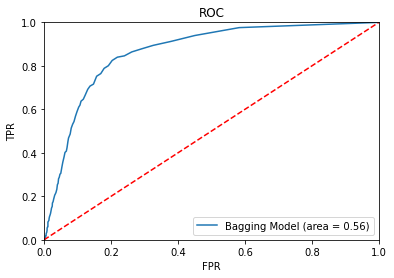

In [140]:
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thres = roc_curve(y_test, bag_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Bagging Model (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

## Random Forest Classifier

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestClassifier(n_estimators=10), X_train, y_train, cv=5)
scores.mean()


0.9015243103545719

## XGBoost Classifier

In [141]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [142]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [143]:
# make predictions for test data
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [144]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.60%


#### Classification Report

In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      3490
         1.0       0.41      0.20      0.27       331

    accuracy                           0.91      3821
   macro avg       0.67      0.58      0.61      3821
weighted avg       0.88      0.91      0.89      3821



#### Confusion Matrix

In [146]:
confusion_matrix(y_test, y_pred)

array([[3397,   93],
       [ 266,   65]], dtype=int64)

#### ROC Curve

In [147]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import auc

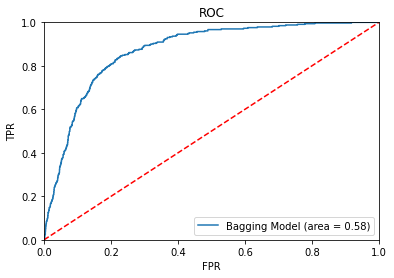

In [148]:
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thres = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Bagging Model (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

## Recommendations 

Both Bagging and Boosting model provides almost same result, we can use any one of the model